In [1]:
import pandas as pd
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
import re
import urllib3
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Gather
- gathering was done manually. Files were downloaded from the website https://www.gapminder.org/data/
- An extra file containing the mapping between countries and continents was downloaded from Kaggle https://www.kaggle.com/statchaitya/country-to-continent

### Exploration:

In [2]:
path = 'data_files/gapminder_stats/'
loaded_data = {}
for root, dirs, files in os.walk(path):
    for filename in files:
        print(filename)
        df = pd.read_csv(path+filename)
        loaded_data[filename[:-4]] = df

inequality_index_gini.csv
number_of_people_in_poverty.csv
services_percent_of_gdp.csv
literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv
income_per_person_gdppercapita_ppp_inflation_adjusted.csv
industry_percent_of_gdp.csv
agriculture_percent_of_gdp.csv


In [3]:
key = list(loaded_data.keys())[0]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

inequality_index_gini
(164, 53)
Last Year: 2018


,country,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
81,Liberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,35.3,NaN,NaN
88,Mali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Sierra Leone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,35.7
155,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.3,NaN,...,NaN,40.0,NaN,NaN,40.7,NaN,NaN,41.1,NaN,NaN
13,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38.8,NaN,NaN,NaN,NaN,37.4,NaN


In [4]:
key = list(loaded_data.keys())[1]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

number_of_people_in_poverty
(145, 37)
Last Year: 2013


,country,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0160,0.0132,NaN,NaN,0.00583,NaN,NaN,NaN,0.0129,NaN
63,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,...,NaN,48.4000,NaN,NaN,53.20000,NaN,43.400,39.500,NaN,NaN
6,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.7000,36.300,NaN,28.60000,NaN,NaN,22.400,NaN,NaN
102,Panama,NaN,0.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3280,0.3190,0.349,0.251,0.16800,0.108,0.141,0.133,0.1520,NaN


In [5]:
key = 'number_of_people_in_poverty'
loaded_data[key].loc[:, loaded_data[key].columns[10]].describe()

count     26.000000
mean      30.658877
std      115.918707
min        0.000000
25%        0.031475
50%        0.486500
75%        0.929250
max      585.000000
Name: 1987, dtype: float64

In [6]:
key = list(loaded_data.keys())[2]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

services_percent_of_gdp
(183, 61)
Last Year: 2019


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
152,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.336,0.341,0.427,0.681,0.457,0.566,NaN,NaN,NaN,NaN
118,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.684,0.685,0.687,0.691,0.699,0.701,0.702,0.701,0.699,0.698
164,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.496,0.504,0.512,0.518,0.531,0.549,0.559,0.565,0.571,0.586
94,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547,0.510,NaN,NaN
21,Botswana,0.431,0.459,0.485,0.505,0.483,0.47,0.463,0.438,0.439,...,0.550,0.527,0.577,0.567,0.558,0.581,0.570,0.591,0.594,0.606


In [7]:
key = list(loaded_data.keys())[3]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

literacy_rate_adult_total_percent_of_people_ages_15_and_above
(150, 38)
Last Year: 2011


,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
27,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911,NaN,...,0.957,NaN,NaN,NaN,NaN,NaN,0.987,0.985,NaN,NaN
100,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,0.257,NaN,NaN,...,NaN,NaN,NaN,0.499,0.541,NaN,0.555,0.549,NaN,NaN
101,Palau,NaN,NaN,NaN,NaN,NaN,0.919,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Jordan,NaN,NaN,NaN,NaN,0.668,NaN,NaN,NaN,NaN,...,NaN,0.899,NaN,0.911,NaN,0.922,NaN,NaN,0.925,0.959
103,Panama,NaN,NaN,NaN,NaN,NaN,0.881,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941,NaN


In [8]:
key = list(loaded_data.keys())[4]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

income_per_person_gdppercapita_ppp_inflation_adjusted
(193, 242)
Last Year: 2040


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
179,Tuvalu,719,719,719,719,719,719,719,719,719,...,5150,5250,5360,5470,5580,5690,5810,5930,6050,6170
35,China,736,735,733,732,730,729,727,726,724,...,28900,29600,30200,30900,31500,32100,32800,33400,34100,34800
38,"Congo, Dem. Rep.",485,487,489,491,493,495,497,499,501,...,1000,1020,1040,1060,1090,1110,1130,1150,1180,1200
56,Eswatini,490,490,490,490,490,490,490,490,490,...,9740,9920,10100,10300,10500,10700,11000,11200,11400,11600
57,Ethiopia,523,523,523,523,523,523,523,523,523,...,3110,3180,3250,3320,3390,3460,3530,3600,3670,3740


<AxesSubplot:>

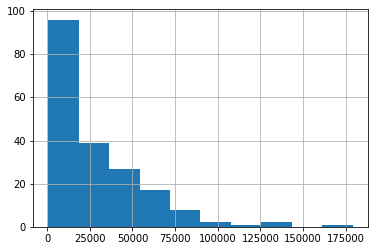

In [9]:
key = 'income_per_person_gdppercapita_ppp_inflation_adjusted'
loaded_data[key].loc[:, loaded_data[key].columns[-1]].hist()

In [10]:
key = list(loaded_data.keys())[5]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

industry_percent_of_gdp
(190, 61)
Last Year: 2019


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
46,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,0.116,0.114,0.113,0.123,0.166,0.171
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600,0.617,0.595,0.571,0.536,0.449,0.476,0.497,0.523,0.487
23,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.687,0.737,0.727,0.700,0.679,0.614,0.573,0.597,0.632,0.625
120,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197,0.201,0.200,0.193,0.184,0.182,0.176,0.177,0.179,0.178
70,Guyana,0.279,0.281,0.318,0.296,0.316,0.314,0.317,0.325,0.345,...,0.311,0.318,0.323,0.312,0.297,0.301,0.364,0.341,0.352,0.347


In [11]:
key = list(loaded_data.keys())[6]
print(key)
print(loaded_data[key].shape)
print("Last Year: " + loaded_data[key].columns[-1])
loaded_data[key].sample(5)

agriculture_percent_of_gdp
(190, 61)
Last Year: 2019


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
139,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0334,0.0315,0.0293,0.0299,0.0336,0.0387,0.0384,0.0355,0.0337,0.0345
66,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0451,0.0445,0.0483,0.0484,0.0610,0.0743,0.0621,0.0537,0.0526,0.0584
92,Lebanon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0386,0.0380,0.0376,0.0395,0.0402,0.0338,0.0288,0.0293,0.0324,0.0529
40,Cote d'Ivoire,0.479,0.464,0.459,0.442,0.398,0.396,0.374,0.348,0.356,...,0.2450,0.2670,0.2220,0.2100,0.2110,0.1840,0.1970,0.1870,0.1750,0.1570
51,El Salvador,NaN,NaN,NaN,NaN,NaN,0.414,0.387,0.385,0.374,...,0.0698,0.0733,0.0651,0.0561,0.0587,0.0553,0.0573,0.0539,0.0509,0.0508


In [12]:
country_continent_map = pd.read_csv('data_files/countryContinent.csv', encoding = "ISO-8859-1")
print(country_continent_map.shape)
country_continent_map.sample(5)

(249, 9)


,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
33,Brunei Darussalam,BN,BRN,96,ISO 3166-2:BN,Asia,South-Eastern Asia,142.0,35.0
229,Turks and Caicos Islands,TC,TCA,796,ISO 3166-2:TC,Americas,Caribbean,19.0,29.0
10,Argentina,AR,ARG,32,ISO 3166-2:AR,Americas,South America,19.0,5.0
166,Oman,OM,OMN,512,ISO 3166-2:OM,Asia,Western Asia,142.0,145.0
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN


In [13]:
country_continent_map.duplicated().sum()

0

# Asses

#### Tidiness
1- A lot of unneeded columns in the country_continent_map df

2- Data is scattered in different dataframes

#### Quality
3- A lot of NANs in all stats dataframes, specially for early years.

4- Start and end year for different stats are different, which would make it hard for any correlation related question.

5- Not all stats available for all countries (for example, number_of_people_in_poverty is available for only 145 countries)

<hr style="border:2px solid black"> </hr>

# Clean

In [14]:
# prepare needed dataframefor cleaning
country_continent_map = country_continent_map.copy()
loaded_data_cleaned = {}
for key in loaded_data:
    loaded_data_cleaned[key] = loaded_data[key].copy() 
stats_cleaned = pd.DataFrame()

1.A lot of unneeded columns in the country_continent_map df

#### Define
- drop unneeded columns

In [15]:
# Code
stats_cleaned = country_continent_map.drop(['code_2', 'code_3', 'country_code', 'sub_region', 'region_code', 'sub_region_code', 'iso_3166_2'], axis='columns')

In [16]:
# Test
stats_cleaned.sample(4)

,country,continent
144,Micronesia (Federated States of),Oceania
39,Canada,Americas
99,Hong Kong,Asia
123,Lebanon,Asia


4- Start and end year for different stats are different, which would make it hard for any correlation related question.

#### Define
- find the highest starting year and lowest ending year
- drop year columns before and after the found values

In [17]:
# Code

start_year = 1000
end_year = 3000
for key in loaded_data:
    first_year = int(loaded_data[key].columns[1])
    last_year = int(loaded_data[key].columns[-1])
    if first_year > start_year:
        start_year = first_year
    if last_year < end_year:
        end_year = last_year
        
print("Start Year: "+ str(start_year))
print("End Year: "+ str(end_year))

Start Year: 1978
End Year: 2011


In [18]:
for key in loaded_data_cleaned:
    for col in range(int(loaded_data_cleaned[key].columns[1]), start_year):
        if str(col) in loaded_data_cleaned[key].columns:
            loaded_data_cleaned[key].drop(str(col), axis="columns", inplace =True)
    for col in range(end_year+1, int(loaded_data_cleaned[key].columns[-1])+1):
        if str(col) in loaded_data_cleaned[key].columns:
            loaded_data_cleaned[key].drop(str(col), axis="columns", inplace =True)

In [19]:
# Test
for key in loaded_data_cleaned:
    print("Start Year: " +  loaded_data_cleaned[key].columns[1] + " End Year:" + loaded_data_cleaned[key].columns[-1])

Start Year: 1978 End Year:2011
Start Year: 1978 End Year:2011
Start Year: 1978 End Year:2011
Start Year: 1978 End Year:2011
Start Year: 1978 End Year:2011
Start Year: 1978 End Year:2011
Start Year: 1978 End Year:2011


3- A lot of NANs in all stats dataframes, specially for early years.

#### Define
- combine every 4 consequent years together.
- drop rows that still contain NAN, if any

In [20]:
for key in loaded_data_cleaned:
    print(key)

inequality_index_gini
number_of_people_in_poverty
services_percent_of_gdp
literacy_rate_adult_total_percent_of_people_ages_15_and_above
income_per_person_gdppercapita_ppp_inflation_adjusted
industry_percent_of_gdp
agriculture_percent_of_gdp


In [21]:
# Code

# first, rename keys to make it easier to generate column names
def rename(df, key_map):
    for key in key_map:
        df[key_map[key]] = df.pop(key)

rename(loaded_data_cleaned ,{ "inequality_index_gini": "inequality_index",
                             "number_of_people_in_poverty":"people_in_poverty",
                             "services_percent_of_gdp":"gdp_services_percent",
                             "literacy_rate_adult_total_percent_of_people_ages_15_and_above":"literacy_rate",
                             "income_per_person_gdppercapita_ppp_inflation_adjusted":"income_per_person",
                             "industry_percent_of_gdp":"gdp_industry_percent",
                             "agriculture_percent_of_gdp":"gdp_agriculture_percent"})

    
for key in loaded_data_cleaned:
    cols = loaded_data_cleaned[key].columns
    
    start_col_to_avg = str(start_year)
    
    # create one column averaging all the values
    loaded_data_cleaned[key][key + '_avg'] = loaded_data_cleaned[key].loc[: , start_col_to_avg:cols[-1]].mean(axis=1)
    
    for i in range(int(cols[6]),int(cols[-1])+1, 4):
        new_col_name = key + '_' + start_col_to_avg + '_' + str(i)
        loaded_data_cleaned[key][new_col_name] = loaded_data_cleaned[key].loc[: , start_col_to_avg:str(i)].mean(axis=1)
        start_col_to_avg = str(i)

In [22]:
# Test
loaded_data_cleaned["inequality_index"].sample(5)

,country,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2011,inequality_index_avg,inequality_index_1978_1983,inequality_index_1983_1987,inequality_index_1987_1991,inequality_index_1991_1995,inequality_index_1995_1999,inequality_index_1999_2003,inequality_index_2003_2007,inequality_index_2007_2011
17,Brazil,NaN,NaN,NaN,58.0,58.4,59.0,58.4,55.6,58.5,...,52.9,57.851852,58.466667,58.24,61.225,57.633333,59.58,58.275000,56.180000,53.875
16,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.2,NaN,...,NaN,60.050000,NaN,54.20,NaN,60.800000,NaN,64.700000,NaN,60.500
40,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.9,52.250000,NaN,NaN,NaN,53.400000,58.60,56.133333,53.180000,49.200
140,Tajikistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31.760000,NaN,NaN,NaN,NaN,29.50,31.100000,32.833333,31.500
54,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.8,34.309091,NaN,NaN,NaN,37.000000,37.00,33.500000,34.020000,34.020


In [23]:
loaded_data_cleaned["gdp_services_percent"].sample(5)

,country,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2011,gdp_services_percent_avg,gdp_services_percent_1978_1983,gdp_services_percent_1983_1987,gdp_services_percent_1987_1991,gdp_services_percent_1991_1995,gdp_services_percent_1995_1999,gdp_services_percent_1999_2003,gdp_services_percent_2003_2007,gdp_services_percent_2007_2011
8,Austria,0.505,0.517,0.516,0.522,0.534,0.540,0.542,0.546,0.550,...,0.623,0.574676,0.522333,0.5468,0.5598,0.5784,0.5874,0.5964,0.6046,0.6162
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.394,0.345077,NaN,NaN,NaN,NaN,0.3790,0.3468,0.3182,0.3642
45,Denmark,0.598,0.604,0.591,0.600,0.602,0.603,0.592,0.591,0.584,...,0.647,0.611500,0.599667,0.5924,0.6034,0.6212,0.6096,0.6112,0.6164,0.6386
15,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.680,0.649941,NaN,NaN,NaN,0.6280,0.6270,0.6414,0.6572,0.6738
32,Chad,0.516,0.493,0.467,0.492,0.488,0.472,0.488,0.476,0.509,...,0.326,0.442265,0.488000,0.4894,0.4928,0.4982,0.4578,0.4348,0.3398,0.3386


2. Data is scattered in different dataframes
5- Not all stats available for all countries (for example, number_of_people_in_poverty is available for only 145 countries)

#### Define
- combine avg columns in one df
- merge such that countries with all NANs for specific stat are dropped

In [24]:
# Code
for key in loaded_data_cleaned:
    cols = loaded_data_cleaned[key].columns
    
    cols_to_merge = list(cols[-9:])
    cols_to_merge.append("country")
#     print(cols_to_merge)
    stats_cleaned = pd.merge(stats_cleaned, loaded_data_cleaned[key].loc[:, cols_to_merge], on = ["country", "country"])

In [25]:
# Test
stats_cleaned.head(5)

,country,continent,inequality_index_avg,inequality_index_1978_1983,inequality_index_1983_1987,inequality_index_1987_1991,inequality_index_1991_1995,inequality_index_1995_1999,inequality_index_1999_2003,inequality_index_2003_2007,...,gdp_industry_percent_2007_2011,gdp_agriculture_percent_avg,gdp_agriculture_percent_1978_1983,gdp_agriculture_percent_1983_1987,gdp_agriculture_percent_1987_1991,gdp_agriculture_percent_1991_1995,gdp_agriculture_percent_1995_1999,gdp_agriculture_percent_1999_2003,gdp_agriculture_percent_2003_2007,gdp_agriculture_percent_2007_2011
0,Albania,Europe,29.825000,NaN,NaN,NaN,NaN,27.0,31.70,30.60,...,0.2486,0.223625,NaN,NaN,NaN,NaN,0.30650,0.23420,0.19240,0.17400
1,Algeria,Africa,34.366667,NaN,NaN,40.20,35.3,35.3,NaN,NaN,...,0.5286,0.086954,NaN,NaN,NaN,NaN,0.11100,0.09658,0.08410,0.08016
2,Angola,Africa,47.350000,NaN,NaN,NaN,NaN,NaN,52.00,NaN,...,0.5494,0.066429,NaN,NaN,NaN,0.06650,0.08374,0.06430,0.05588,0.05740
3,Argentina,Americas,47.329167,40.8,44.05,46.05,46.4,49.6,51.84,48.22,...,0.2590,0.070871,0.077317,0.08106,0.08306,0.05656,0.05178,0.06842,0.08198,0.06834
4,Armenia,Asia,32.533333,NaN,NaN,NaN,NaN,36.2,34.85,33.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
loaded_data_cleaned["inequality_index"].head(5)

,country,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2011,inequality_index_avg,inequality_index_1978_1983,inequality_index_1983_1987,inequality_index_1987_1991,inequality_index_1991_1995,inequality_index_1995_1999,inequality_index_1999_2003,inequality_index_2003_2007,inequality_index_2007_2011
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.825000,NaN,NaN,NaN,NaN,27.0,31.70,30.60,30.00
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,34.366667,NaN,NaN,40.20,35.3,35.3,NaN,NaN,27.60
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47.350000,NaN,NaN,NaN,NaN,NaN,52.00,NaN,42.70
3,Argentina,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,...,42.7,47.329167,40.8,44.05,46.05,46.4,49.6,51.84,48.22,44.64
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.4,32.533333,NaN,NaN,NaN,NaN,36.2,34.85,33.48,29.56


In [27]:
stats_cleaned.shape

(105, 65)

In [28]:
stats_cleaned.continent.value_counts()

Africa      40
Asia        24
Americas    22
Europe      18
Oceania      1
Name: continent, dtype: int64

#### Save

In [29]:
stats_cleaned.to_csv("stats_cleaned.csv", index=False)

<hr style="border:2px solid black"> </hr>

# Insights

### Is there a correlation between the income per pserson and the literacy rate?

<AxesSubplot:title={'center':'Correlation between Income per person and literacy rate'}, xlabel='literacy_rate_avg', ylabel='income_per_person_avg'>

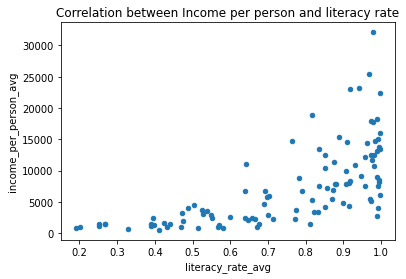

In [30]:
stats_cleaned = pd.read_csv("stats_cleaned.csv")
cols = list(stats_cleaned.columns)
stats_cleaned.plot.scatter('literacy_rate_avg', 'income_per_person_avg', title = "Correlation between Income per person and literacy rate")

### Over time, How did different areas in the world grow in the number of people in poverty?

Text(0, 0.5, 'number of people in poverty (in millions)')

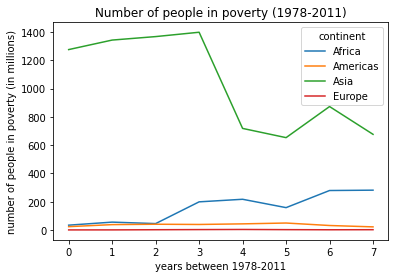

In [31]:
col_filtered = list(filter(lambda col: col.startswith('people_in_poverty') and not col.endswith('avg'), cols))
graph = stats_cleaned.groupby('continent').sum().loc[:, col_filtered].transpose(copy=True).drop(columns=['Oceania']).plot(use_index=False, title ="Number of people in poverty (1978-2011)")
graph.set_xlabel('years between 1978-2011')
graph.set_ylabel('number of people in poverty (in millions)')

### Over time, How did different areas in the world grow in literacy rate?

Text(0, 0.5, 'literacy rate')

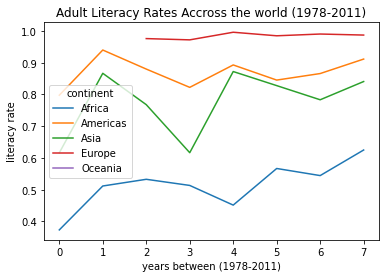

In [32]:
col_filtered = list(filter(lambda col: col.startswith('literacy_rate') and not col.endswith('avg'), cols))
graph = stats_cleaned.groupby('continent').mean().loc[:, col_filtered].transpose(copy=True).plot(use_index=False, title = "Adult Literacy Rates Accross the world (1978-2011)")
graph.set_xlabel("years between (1978-2011)")
graph.set_ylabel("literacy rate")

### Over time, Does inequality increase or decrease around the world?

Text(0, 0.5, 'Inequality Index')

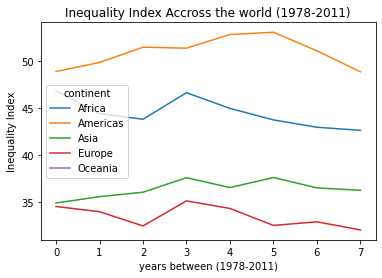

In [33]:
col_filtered = list(filter(lambda col: col.startswith('inequality') and not col.endswith('avg'), cols))
graph = stats_cleaned.groupby('continent').mean().loc[:, col_filtered].transpose(copy=True).plot(use_index=False, title="Inequality Index Accross the world (1978-2011)")
graph.set_xlabel("years between (1978-2011)")
graph.set_ylabel("Inequality Index")

### Over time, which sector seems to be flourishing among the 3(agriculture/industry/services)?

Text(0, 0.5, 'GDP Services Percentage')

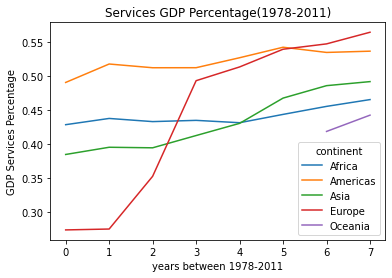

In [34]:
col_filtered = list(filter(lambda col: col.startswith('gdp_services') and not col.endswith('avg'), cols))
graph = stats_cleaned.groupby('continent').mean().loc[:, col_filtered].transpose(copy=True).plot(use_index=False, title="Services GDP Percentage(1978-2011)")
graph.set_xlabel("years between 1978-2011")
graph.set_ylabel("GDP Services Percentage")

Text(0, 0.5, 'GDP Industry Percentage')

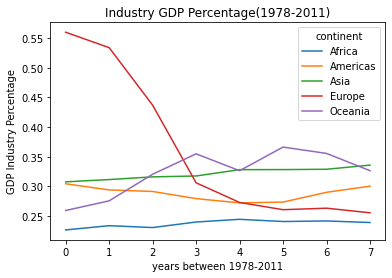

In [35]:
col_filtered = list(filter(lambda col: col.startswith('gdp_industry') and not col.endswith('avg'), cols))
graph = stats_cleaned.groupby('continent').mean().loc[:, col_filtered].transpose(copy=True).plot(use_index=False,title="Industry GDP Percentage(1978-2011)")
graph.set_xlabel("years between 1978-2011")
graph.set_ylabel("GDP Industry Percentage")

Text(0, 0.5, 'GDP Agriculture Percentage')

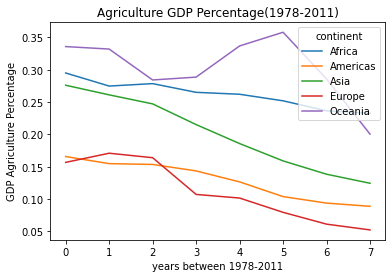

In [36]:
col_filtered = list(filter(lambda col: col.startswith('gdp_agri') and not col.endswith('avg'), cols))
graph = stats_cleaned.groupby('continent').mean().loc[:, col_filtered].transpose(copy=True).plot(use_index=False, title="Agriculture GDP Percentage(1978-2011)")
graph.set_xlabel("years between 1978-2011")
graph.set_ylabel("GDP Agriculture Percentage")